In [6]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
import pandas as pd

# Not sure why I need this - do I?
# import matplotlib
# matplotlib.get_backend()
# print(matplotlib.rcParams['backend'])

In [2]:
# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

from session_directory import find_eraser_directory as get_dir
import er_plot_functions as erp
import Placefields as pf
import freezing_analysis as fa
import helpers 
import eraser_reference as err

# Project save directory here
print_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'

First, plot example freezing cells from Marble07: 53, 67, 90, and 334

Next, plot example cell from ANI (Marble17 cell 144 from day 1) to show crappy stability along with Marble25 cell 375 day 1.

Assembling neuron map for base_day=4 and base_arena=Shock
Cannot find normal map - trying to run in reverse


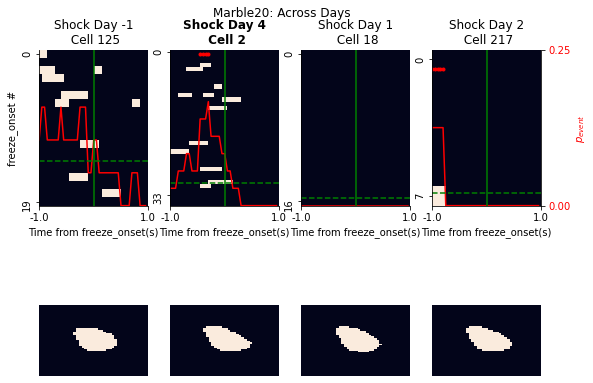

In [3]:
mmd = fa.MotionTuningMultiDay('Marble20', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(2, base_day=4, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble20_freeze_cell2_day4_across_days.jpg'), dpi=600)

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


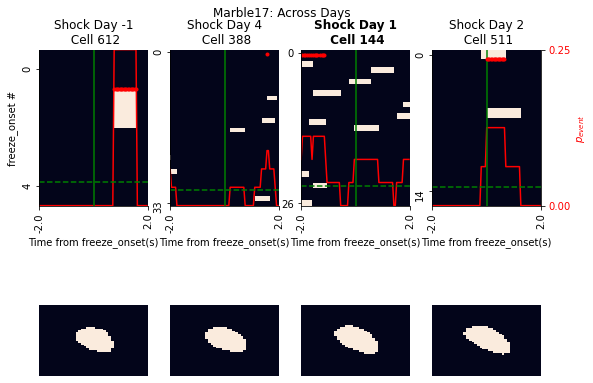

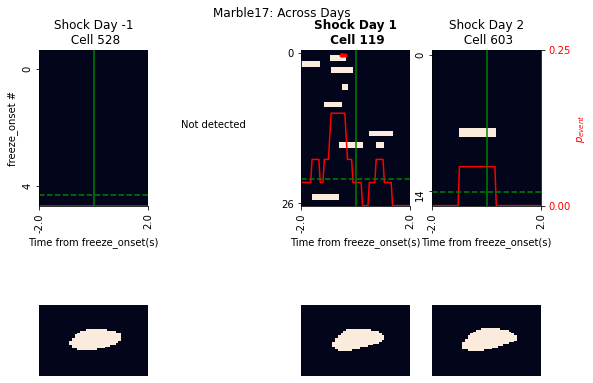

In [4]:
mmd = fa.MotionTuningMultiDay('Marble17', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(144, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble17_freeze_cell144_day1_across_days.jpg'), dpi=600)
mmd.plot_raster_across_days(119, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble17_freeze_cell119_day1_across_days.jpg'), dpi=600)

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


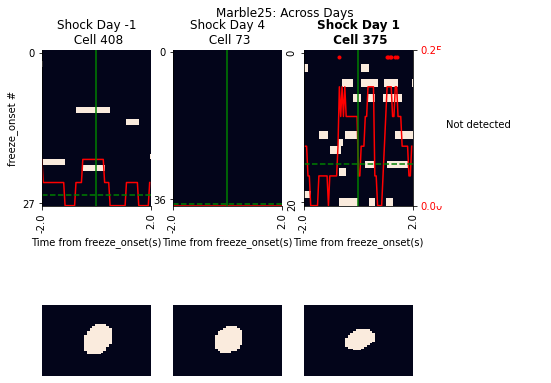

In [5]:
mmd = fa.MotionTuningMultiDay('Marble25', arena = 'Shock', days= [-1, 4, 1, 2])
mmd.plot_raster_across_days(375, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble25_freeze_cell375_day1_across_days.jpg'), dpi=600)

Next plot example cell from Learner (Marble24 day 1 cell 36) to show a cell that comes online during 4 hour session and then stays stable through day 2. Also Marble 12 shock day 4 cell 128.

In [6]:
mmd = fa.MotionTuningMultiDay('Marble12', arena = 'Shock', days= [-1, 4, 1, 2])

Assembling neuron map for base_day=4 and base_arena=Shock
Cannot find normal map - trying to run in reverse


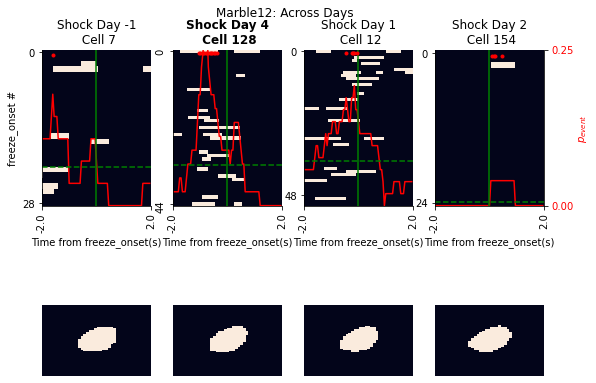

In [7]:
mmd.plot_raster_across_days(128, base_day=4, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble12_freeze_cell128_day4_across_days.jpg'), dpi=600)

In [8]:
mmd = fa.MotionTuningMultiDay('Marble24', arena = 'Shock', days= [-1, 4, 1, 2])

Assembling neuron map for base_day=1 and base_arena=Shock
Cannot find normal map - trying to run in reverse
Cannot find normal map - trying to run in reverse


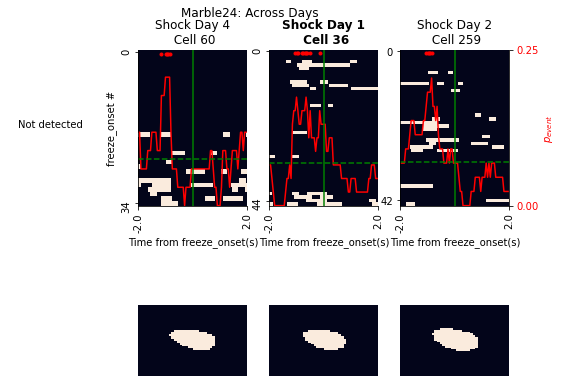

In [9]:
mmd.plot_raster_across_days(36, base_day=1, base_arena='Shock', batch_map=False)
plt.gcf().savefig(os.path.join(print_dir, 'Marble24_freeze_cell36_day1_across_days.jpg'), dpi=600)

In [10]:
plt.gcf().savefig(os.path.join(print_dir, 'Marble24_freeze_cell36_day1_across_days.png'))

<Figure size 432x288 with 0 Axes>

Last, show % of cells that are freezing cells across days

Plot off ratios across days

2sided t-test Day -1 : pval=0.655 tstat=0.46
2sided t-test Day 1 : pval=0.973 tstat=-0.0343
2sided t-test Day 2 : pval=0.693 tstat=0.406


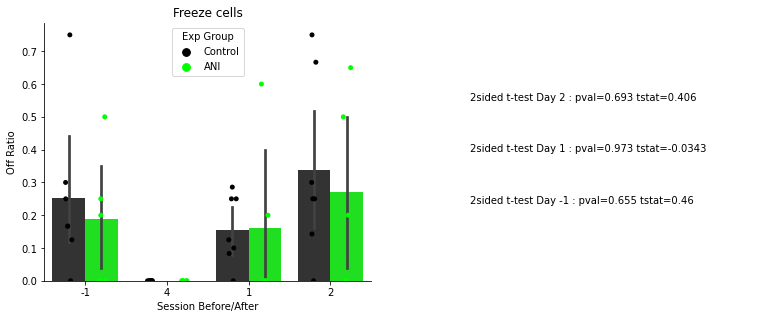

In [14]:
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object
base_day = 4
group = 'Exp Group'
fig, ax = ts.plot_off_ratio_by_group(base_day=base_day, group=group)
    
fig.savefig(os.path.join(print_dir, 'Freeze_cell_off_ratio_day' + str(base_day) + 'base.jpg'), dpi=600)

In [12]:
# Orlin note - show turnover for freeze cells on day -1 and Hopefully it isn't different between groups on day -2.

Plot across day stability of freeze neurons looking at peak event rate as your metric

/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/nkinsky/miniconda3/envs/eraser/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


2sided t-test Learners v Nonlearners day 4: pval= 0.000134, tstat=4.07
2sided t-test Learners v ANI day 4: pval= 0.000254, tstat=3.9
2sided t-test Learners v Nonlearners day 4: pval= 0.983, tstat=-0.021
2sided t-test Learners v Nonlearners day 2: pval= 0.0591, tstat=1.92
2sided t-test Learners v ANI day 2: pval= 0.47, tstat=-0.726
2sided t-test Learners v Nonlearners day 2: pval= 0.0142, tstat=-2.5


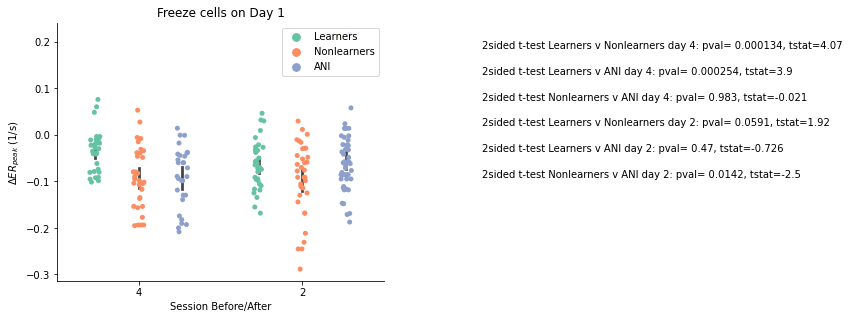

In [18]:
ts = fa.TuningStability('Shock', 'freeze_onset', 0.01) # Load in tuningstability object

base_day = 1
metric_plot = 'event_rates'
delta=True
fig, ax = ts.plot_metric_stability_by_group(base_day=base_day, metric_plot=metric_plot, delta=delta)
fig.savefig(os.path.join(print_dir, 'freeze_cell_event_rate_across_days_base' + str(base_day) + 'notebook.pdf'))


Now get % of cells that have freeze-related tuning on each day of the experiment

In [28]:
# First run tunings for 'Open' arena
group_names = ['Learners', 'Nonlearners', 'ANI']
exp_group_names = ['Control', 'Control', 'ANI']
arena = 'Open'
events = 'freeze_onset'
days = [-1, 4, 1, 2]
for group, exp_group_name, group_name in zip(mice_groups, exp_group_names, group_names):
    for mouse in group:
        print('Running ' + mouse)
        for day in days:
            md = fa.MotionTuning(mouse, arena, day)
            if md.sig[events] == {}:  # Run significant tuning if not done
                print('No tuning found for day ' + str(day) + '. Running now.')
                md.get_tuning_sig(events=events)
                md.save_sig_tuning()

Running Marble07
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day -1. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 4. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 1. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 2. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
Running Marble12
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()


No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 2. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
Running Marble19
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day -1. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 4. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found for day 1. Running now.
calculating significant tuning for nperm=1000
generating permuted rasters - may take up to 1 minute
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
No tuning found f

In [29]:
day_list, arena_list, group_list, exp_group_list, prop_tuned_list, mouse_list = [], [], [], [], [], []
mice_groups = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Nonlearners', 'ANI']
exp_group_names = ['Control', 'Control', 'ANI']
arena = 'Open'
days = [-1, 4, 1, 2]
for group, exp_group_name, group_name in zip(mice_groups, exp_group_names, group_names):
    for mouse in group:
        mmd = fa.MotionTuningMultiDay(mouse, arena=arena, days=days)
        p_tuned = mmd.get_prop_tuned()
        group_list.extend([group_name]*len(p_tuned))
        exp_group_list.extend([exp_group_name]*len(p_tuned))
        day_list.extend(days)
        arena_list.extend([arena]*len(p_tuned))
        prop_tuned_list.extend(p_tuned)
        mouse_list.extend([mouse]*len(p_tuned))

df_prop = pd.DataFrame({'Exp Group': exp_group_list, 'Group': group_list, 'Mouse': mouse_list,
                        'Day': day_list, 'Arena': arena_list, 'Prop Tuned': prop_tuned_list})

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38


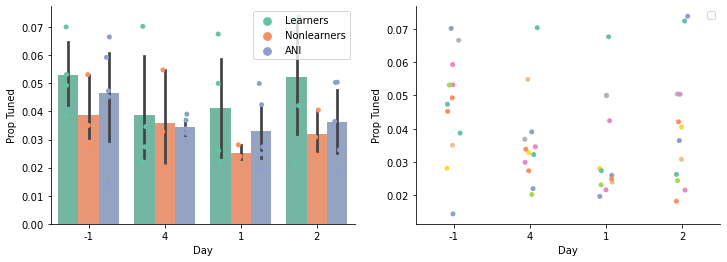

In [30]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches([12, 4])
sns.stripplot(data=df_prop, y='Prop Tuned', x='Day', hue='Group', palette='Set2', dodge=True, ax=ax[0], order=days)
group_rows = df_prop.loc[:, 'Group'].copy()  # This generates warnings about chained indexing for some reason
group_rows_ = ["_" + row for row in df_prop['Group']]
df_prop.loc[:, 'Group'] = group_rows_
sns.barplot(data=df_prop, y='Prop Tuned', x='Day', hue='Group', palette='Set2', dodge=True, ax=ax[0], order=days)
ax[0].legend(loc='upper right')
df_prop.loc[:, 'Group'] = group_rows

sns.stripplot(data=df_prop, y='Prop Tuned', x='Day', hue='Mouse', palette='Set2', dodge=False, ax=ax[1], order=days)
# sns.barplot(data=df_prop, y='Prop Tuned', x='Day', hue='Mouse', palette='Set2', dodge=False, ax=ax[1], order=days)
sns.despine(fig=fig)
ax[1].legend([])



In [31]:
fig.savefig(os.path.join(print_dir, 'freeze_cell_proportion_Open.jpg'), dpi=600)

# NEXT - look at time of first transient on day 4 for all groups. Prediction is that Learners come online later generally, reflecting some sort of plasticity event, while Nonlearners have more robust tuning from the get-go?

# Look at overlap between freeze cells from one day to the next between groups!

# Another thought - aren't freeze cells just ripple reactivated cells?